In [561]:
import pandas as pd
import numpy as np

In [562]:
# Import Fall 2020 Greek update data.
df = pd.read_csv("greeks.csv")
# df.set_index("greek_name", inplace=True)
df.sort_values(by=["year", "council", "size"],
               ascending = [False, True, True],
               inplace=True)
df.fillna(0, inplace=True)
df.head()

,year,inits,greek_name,council,actives,nm,size,gpa,serv_hrs
10,2020,ODP,ΩΔΦ,IFC,6,0,6,3.65,56.0
6,2020,DSP,ΔΣΦ,IFC,21,1,22,3.14,0.0
17,2020,TRI,TRI,IFC,22,0,22,3.05,128.0
2,2020,ATO,ATΩ,IFC,22,5,27,3.46,433.0
13,2020,PKA,ΠKA,IFC,29,25,54,3.26,0.0


In [563]:
# Since I'm not trying to be in the business of "us vs them", I want to make sure
# this analysis shows *my* members where we are in relative comparison to other
# houses. I don't need them to have their names explicitly mentioned to do that.
df.drop(df[df["council"] == "PH"].index, inplace=True)
df.drop(df[df["inits"] == "DST"].index, inplace=True)


houses = df["greek_name"].unique()
obfs = {}
for i, e in enumerate(houses):
    obfs[e] = f"House {chr(ord('A') + len(houses) - i - 1)}"

obfs["TRI"] = "TRIANGLE"

df["greek_name"] = df["greek_name"].map(obfs)

obfs

{'KΔX': 'House G',
 'AXΩ': 'House F',
 'AΦ': 'House E',
 'KKΓ': 'House D',
 'ΔΓ': 'House C',
 'XΩ': 'House B',
 'ΠBΦ': 'House A',
 'TRI': 'TRIANGLE'}

In [564]:
df["tot_gpa"] = df["size"] * df["gpa"]
df["avg_shours"] = df["serv_hrs"] / df["size"]
df

,year,inits,greek_name,council,actives,nm,size,gpa,serv_hrs,tot_gpa,avg_shours
7,2020,KDX,House G,PH,5,0,5,3.28,0.0,16.40,0.000000
0,2020,ACO,House F,PH,61,51,112,3.36,828.0,376.32,7.392857
1,2020,AP,House E,PH,70,61,131,3.14,1942.0,411.34,14.824427
8,2020,KKG,House D,PH,88,44,132,3.46,553.0,456.72,4.189394
5,2020,DG,House C,PH,83,56,139,3.50,217.0,486.50,1.561151
4,2020,CO,House B,PH,104,54,158,3.41,914.0,538.78,5.784810
12,2020,PhPB,House A,PH,101,57,158,3.40,323.0,537.20,2.044304
25,2019,KDX,House G,PH,5,2,7,3.48,0.0,24.36,0.000000
18,2019,ACO,House F,PH,57,35,92,3.04,1654.0,279.68,17.978261
26,2019,KKG,House D,PH,77,42,119,3.28,1005.0,390.32,8.445378


In [565]:
# According to the data, PKA did 66 hours *per person* in 2019. This is obviously 
# not the case, so we'll pull their numbers from 2018.

df.at[31, "avg_shours"] = 0
df.at[31, "serv_hrs"] = 0

In [566]:
cncmed_grp = df.groupby(
    by=["year"]
)

df["cnc_med"] = df["year"].map(dict(zip(
    cncmed_grp.count().index,
    cncmed_grp.median()["size"]
)))

df["cnc_avg"] = df["year"].map(dict(zip(
    cncmed_grp.count().index,
    cncmed_grp.mean()["size"]
)))

df["gte_med_size"] = (df["size"] > df["cnc_med"]).astype(int)
df["is_med_size"] = (df["size"] == df["cnc_med"]).astype(int)
df["gte_avg_size"] = (df["size"] > df["cnc_med"]).astype(int)
df

,year,inits,greek_name,council,actives,nm,size,gpa,serv_hrs,tot_gpa,avg_shours,cnc_med,cnc_avg,gte_med_size,is_med_size,gte_avg_size
7,2020.0,KDX,House G,PH,5.0,0.0,5.0,3.28,0.0,16.40,0.000000,132.0,119.285714,0,0,0
0,2020.0,ACO,House F,PH,61.0,51.0,112.0,3.36,828.0,376.32,7.392857,132.0,119.285714,0,0,0
1,2020.0,AP,House E,PH,70.0,61.0,131.0,3.14,1942.0,411.34,14.824427,132.0,119.285714,0,0,0
8,2020.0,KKG,House D,PH,88.0,44.0,132.0,3.46,553.0,456.72,4.189394,132.0,119.285714,0,1,0
5,2020.0,DG,House C,PH,83.0,56.0,139.0,3.50,217.0,486.50,1.561151,132.0,119.285714,1,0,1
4,2020.0,CO,House B,PH,104.0,54.0,158.0,3.41,914.0,538.78,5.784810,132.0,119.285714,1,0,1
12,2020.0,PhPB,House A,PH,101.0,57.0,158.0,3.40,323.0,537.20,2.044304,132.0,119.285714,1,0,1
25,2019.0,KDX,House G,PH,5.0,2.0,7.0,3.48,0.0,24.36,0.000000,135.0,112.285714,0,0,0
18,2019.0,ACO,House F,PH,57.0,35.0,92.0,3.04,1654.0,279.68,17.978261,135.0,112.285714,0,0,0
26,2019.0,KKG,House D,PH,77.0,42.0,119.0,3.28,1005.0,390.32,8.445378,135.0,112.285714,0,0,0


In [567]:
med_grp = df.groupby(
    by = ["year", "gte_med_size"]
)

med_grp.mean()

actives         nm        size       gpa     serv_hrs  \
year   gte_med_size                                                            
2018.0 0             56.750000  43.500000  100.250000  3.205000   532.500000   
       1             97.333333  52.666667  150.000000  3.340000   545.000000   
2019.0 0             54.250000  34.000000   88.250000  3.202500   964.750000   
       1             92.333333  52.000000  144.333333  3.306667  1291.333333   
2020.0 0             56.000000  39.000000   95.000000  3.310000   830.750000   
       1             96.000000  55.666667  151.666667  3.436667   484.666667   

                        tot_gpa  avg_shours  cnc_med     cnc_avg  is_med_size  \
year   gte_med_size                                                             
2018.0 0             318.062500    5.818473    143.0  121.571429         0.25   
       1             501.073333    3.732877    143.0  121.571429         0.00   
2019.0 0             275.177500    8.828132    135.0  112.285714         0.25   
       1             477.210000    9.061551    135.0  112.285714         0.00   
2020.0 0             315.195000    6.601670    132.0  119.285714         0.25   
       1             520.826667    3.130088    132.0  119.285714         0.00   

                     gte_avg_size  
year   gte_med_size                
2018.0 0                      0.0  
       1                      1.0  
2019.0 0                      0.0  
       1                      1.0  
2020.0 0                      0.0  
       1                      1.0

In [568]:
ifc_sum = df[df["council"] == "IFC"].groupby(
    by = ["year", "gte_med_size"]
).sum()

print(ifc_sum["tot_gpa"] / ifc_sum["size"])
print(ifc_sum["serv_hrs"] / ifc_sum["size"])
print()
print(ifc_sum["size"])

Series([], dtype: float64)
Series([], dtype: float64)

Series([], Name: size, dtype: float64)


132.0


<Figure size 432x288 with 0 Axes>

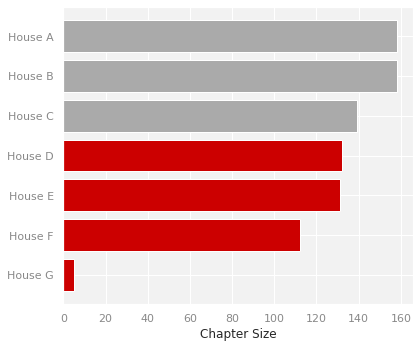

In [569]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as fm

sns.set_theme()
plt.tight_layout()

fig: plt.Figure = plt.figure(figsize=(6, 5))
fig.subplots_adjust(top=0.95)
gs = GridSpec(nrows=1, ncols=1)

ifc_df = df[df["year"] == 2020]

color = (ifc_df["gte_med_size"]).map({
    0: "#CC0000",
    1: "#AAAAAA",
#    2: "#CC7777"
})

# color.at["TRI"] = "#C08081"

ax0: plt.Axes = fig.add_subplot(gs[0,0])
ax0.set_facecolor("#F2F2F2")
ax0.barh(
    ifc_df["greek_name"],
    ifc_df["size"],
    color=color
)

print(ifc_df.iloc[0]["cnc_med"])

ax0.set_xlabel("Chapter Size")

# ax0.axhline(5, xmin=0.5, xmax=0.73, color='#CC7777')
# ax0.axhspan(4, 6, xmin=0.73, xmax=1.0, color="white")
# ax0.annotate(
#     f"Median: {ifc_df.iloc[0].cnc_med}",
#     xy=(106, 4.8),
#     color="#888888"
# )

ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    colors='#888888',
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    # labelbottom=False  # labels along the bottom edge are off
) 

ax0.tick_params(
    axis='y',          # changes apply to the x-axis
    colors='#888888',
)

plt.savefig("output/ifc.png", format="png", dpi=500)
plt.show()

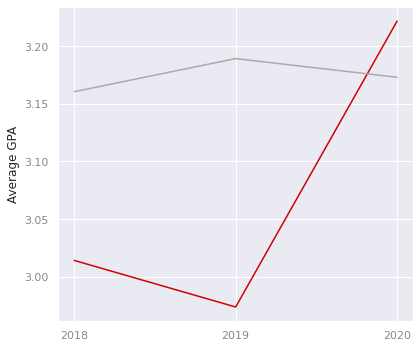

In [ ]:
from matplotlib.ticker import MaxNLocator
fig: plt.Figure = plt.figure(figsize=(6, 5))
fig.subplots_adjust(top=0.95)
gs = GridSpec(nrows=1, ncols=1)

ifc_sum = df[df["council"] == "IFC"].groupby(
    by = ["year", "gte_med_size"]
).sum()

avg_gpa = ifc_sum["tot_gpa"] / ifc_sum["size"]
sml_gpa = avg_gpa.loc[:, 0]
big_gpa = avg_gpa.loc[:, 1]

avg_svc = ifc_sum["serv_hrs"] / ifc_sum["size"]
sml_svc = avg_svc.loc[:, 0]
big_svc = avg_svc.loc[:, 1]

ax0: plt.Axes = fig.add_subplot(gs[0, 0])
ax0.plot(
    sml_gpa.index,
    sml_gpa,
    color="#CC0000"
)
ax0.plot(
    big_gpa.index,
    big_gpa,
    color="#AAAAAA"
)
ax0.set_ylabel("Average GPA")
ax0.xaxis.set_major_locator(MaxNLocator(integer=True))
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    colors='#888888',
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    # labelbottom=False  # labels along the bottom edge are off
) 

ax0.tick_params(
    axis='y',          # changes apply to the x-axis
    colors='#888888',
)

plt.savefig("output/gpa_lines.png", format="png", dpi=500)
plt.show()

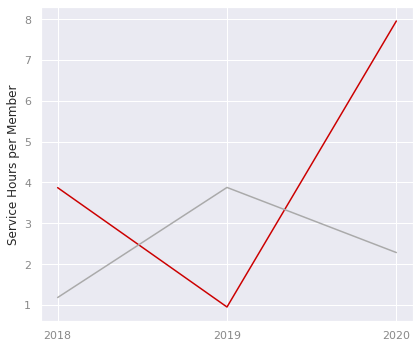

In [ ]:
from matplotlib.ticker import MaxNLocator
fig: plt.Figure = plt.figure(figsize=(6, 5))
fig.subplots_adjust(top=0.95)
gs = GridSpec(nrows=1, ncols=1)

ax0: plt.Axes = fig.add_subplot(gs[0, 0])
ax0.plot(
    sml_svc.index,
    sml_svc,
    color="#CC0000"
)
ax0.plot(
    big_svc.index,
    big_svc,
    color="#AAAAAA"
)
ax0.set_ylabel("Service Hours per Member")

ax0.xaxis.set_major_locator(MaxNLocator(integer=True))
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    colors='#888888',
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    # labelbottom=False  # labels along the bottom edge are off
) 

ax0.tick_params(
    axis='y',          # changes apply to the x-axis
    colors='#888888',
)

ax0.tick_params(
    axis='y',          # changes apply to the x-axis
    colors='#888888',
)

plt.savefig("output/svc_lines.png", format="png", dpi=500)
plt.show()